In [1]:
# Wine Dataset looking at the Quality level of the wine with 11 classes 

In [90]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.2 MB/s eta 0:00:0000:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [219]:
import pandas as pd
import numpy as np 
import csv
import os
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torch.nn as nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR



In [137]:
# Format Data into usable format

red_wine_path = '~/Desktop/Projects/Thesis/Wine/winequality/winequality-red.csv'
white_wine_path = '~/Desktop/Projects/Thesis/Wine/winequality/winequality-white.csv'



In [138]:
# Open the CSV file
#'~/Desktop/Projects/Thesis/Wine/winequality/winequality-red.csv

file_path = os.path.expanduser('~/Desktop/Projects/Thesis/Wine/winequality/winequality-red.csv')
with open(file_path, 'r') as file:
    reader = csv.reader(file, delimiter=';')
    #print(reader)
    column_names = None
    columns = []

    for index, row in enumerate(reader):
        if index == 0:
            column_names = row
        elif len(row) >= len(column_names):
            column_data = [value.split(";") for value in row]
            columns.append(column_data)
    
        
    red_df = pd.DataFrame(columns=column_names, data=columns).applymap(lambda x: x[0] if isinstance(x, list) else x)
    
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [139]:
red_df['quality'].nunique()

6

In [140]:
file_path = os.path.expanduser(white_wine_path)
with open(file_path, 'r') as file:
    reader = csv.reader(file, delimiter=';')
    #print(reader)
    column_names = None
    columns = []

    for index, row in enumerate(reader):
        if index == 0:
            column_names = row
        elif len(row) >= len(column_names):
            column_data = [value.split(";") for value in row]
            columns.append(column_data)
    
        
    white_df = pd.DataFrame(columns=column_names, data=columns).applymap(lambda x: x[0] if isinstance(x, list) else x)
    
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6
4894,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


In [141]:
white_df['quality'].nunique()

7

In [142]:
# Append dataframes x 
# Class imabalance 
# Feature Scaling 
# Encoding categorical variables

red_df['color'] = 'red'
white_df['color'] =  'white'


full_wine_df = pd.concat([red_df, white_df], ignore_index=True)
full_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,red
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,white
6493,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,white


In [156]:
# Make the numbers into numeric except quality since it will treated as a categorical and color of wines 

non_numeric_columns = full_wine_df.select_dtypes(include='object').columns.drop(['color', 'quality'])
full_wine_df[non_numeric_columns] = full_wine_df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')


In [157]:
# Class Imbalance
color_dist = full_wine_df['color'].value_counts()

# Calculate the class distribution
quality_class_dist = full_wine_df['quality'].value_counts()
full_wine_df['quality'].nunique()

color_dist, quality_class_dist, full_wine_df['quality'].nunique()

(white    4898
 red      1599
 Name: color, dtype: int64,
 6    2836
 5    2138
 7    1079
 4     216
 8     193
 3      30
 9       5
 Name: quality, dtype: int64,
 7)

In [158]:
# Separate the features and the target variable
X = full_wine_df.drop('quality', axis=1)
y = full_wine_df['quality']

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the oversampled data
oversampled_df = pd.concat([X_oversampled, y_oversampled], axis=1)

# Check the class distribution after oversampling
quality_class_dist_oversampled = oversampled_df['quality'].value_counts()
quality_class_dist_oversampled, oversampled_df['color'].value_counts()

(4    2836
 3    2836
 9    2836
 5    2836
 6    2836
 8    2836
 7    2836
 Name: quality, dtype: int64,
 white    15921
 red       3931
 Name: color, dtype: int64)

In [159]:
# Fix the class distribution issue
# I thought that the model had 11 classes turns out that it was 7
# Apply random undersampling to balance the class distribution
rus = RandomUnderSampler(random_state=42)
features = oversampled_df.drop(['color'], axis=1)
labels = oversampled_df['color']
resampled_features, resampled_labels = rus.fit_resample(features, labels)

# Create a new DataFrame with the balanced data
balanced_df = pd.DataFrame(resampled_features, columns=features.columns)
balanced_df['color'] = resampled_labels

# Calculate the class distribution for 'color' column after undersampling
balanced_color_dist = balanced_df['color'].value_counts()

# Calculate the class distribution for 'quality' column after undersampling
balanced_quality_class_dist = balanced_df['quality'].value_counts()

# Print the balanced class distribution
print("Balanced Class Distribution:")
print(balanced_color_dist)
print(balanced_quality_class_dist)

Balanced Class Distribution:
white    3931
red      3931
Name: color, dtype: int64
3    1412
5    1375
4    1230
6    1194
7    1113
8     883
9     655
Name: quality, dtype: int64


In [160]:
# Data Exploration: imbalanced dataset 

# Explore the dataset
print("Head of the dataset:")
print(full_wine_df.head())

print("Summary statistics:")
print(full_wine_df.describe())

print("Data types:")
print(full_wine_df.dtypes)

print("Missing values:")
print(full_wine_df.isnull().sum())




Head of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality color  
0      9.4       5   red  
1      9.8 

In [161]:
# This needs to be fixed ( Probably will be fixed when columns are converted to numeric)
print("Correlation matrix:")
correlation_matrix = full_wine_df.corr()
correlation_matrix

Correlation matrix:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


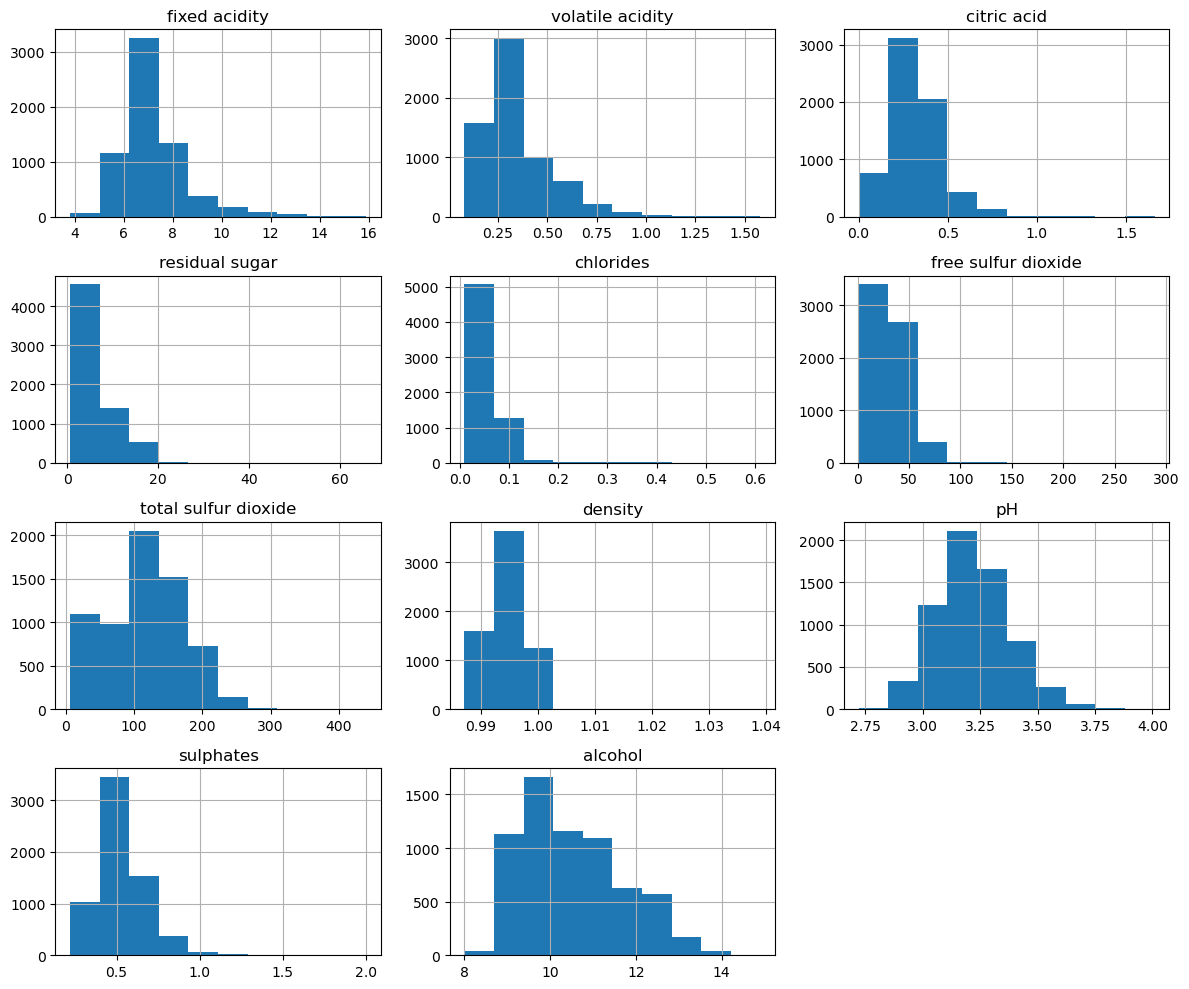

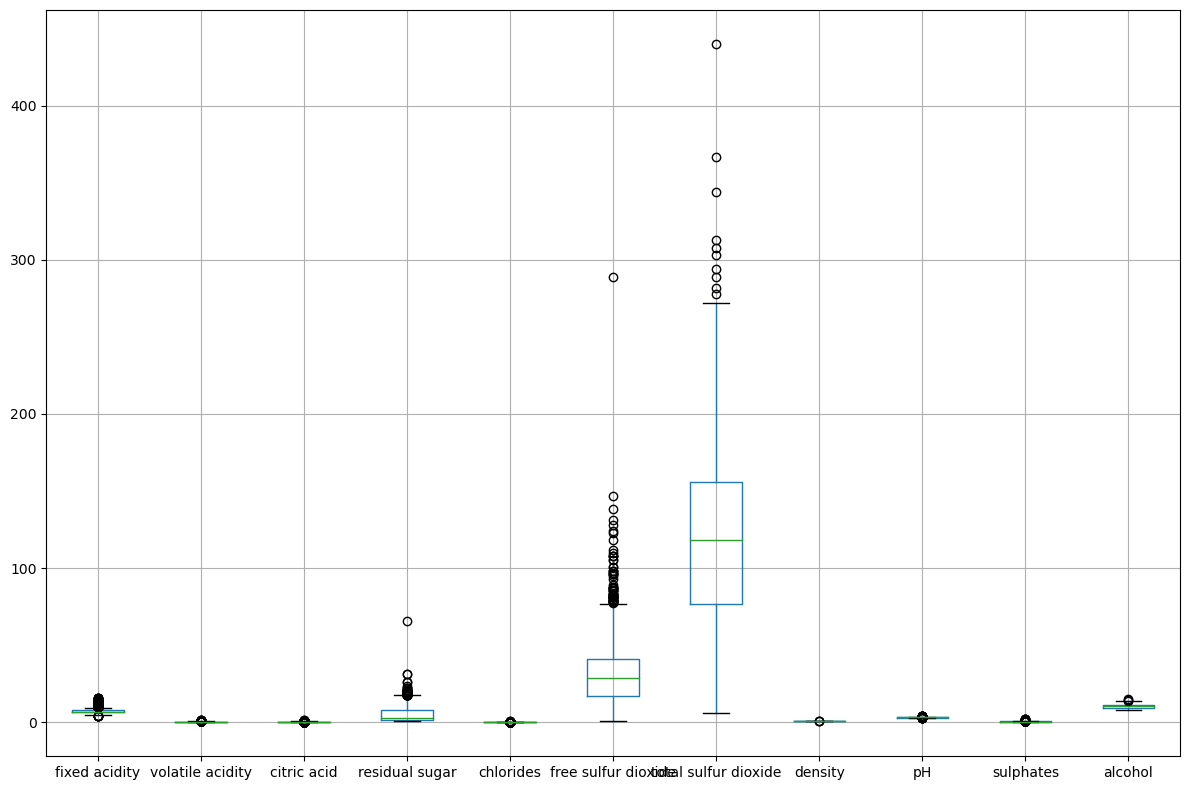

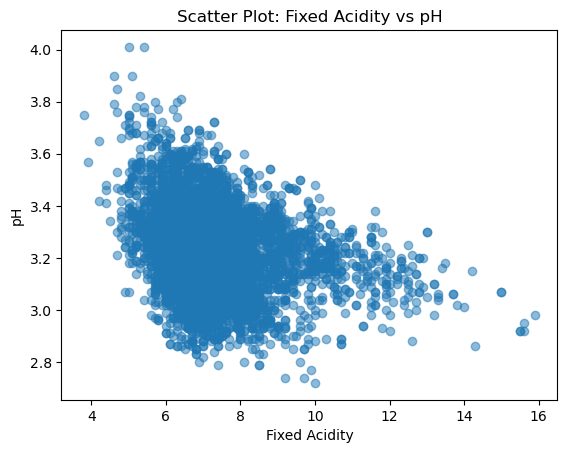

Grouped data:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.853333          0.517000     0.281000        5.140000   
4             7.288889          0.457963     0.272315        4.153704   
5             7.326801          0.389614     0.307722        5.804116   
6             7.177257          0.313863     0.323583        5.549753   
7             7.128962          0.288800     0.334764        4.731696   
8             6.835233          0.291010     0.332539        5.382902   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.077033            39.216667            122.033333  0.995744   
4         0.060056            20.636574            103.432870  0.994833   
5         0.064666          

In [162]:
# Histograms of numerical columns
full_wine_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots of numerical columns
full_wine_df.boxplot(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Scatter plot of two numerical columns
plt.scatter(full_wine_df['fixed acidity'], full_wine_df['pH'], alpha=0.5)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Scatter Plot: Fixed Acidity vs pH')
plt.show()

# Group data by wine quality and calculate mean, median, etc.
grouped_data = full_wine_df.groupby('quality').mean()
print("Grouped data:")
print(grouped_data)

In [151]:
# Data Exploration using the imbalance dataset

# Data Exploration: imbalanced dataset 

# Explore the dataset
print("Head of the dataset:")
print(balanced_df.head())

print("Summary statistics:")
print(balanced_df.describe())

print("Data types:")
print(balanced_df.dtypes)

print("Missing values:")
print(balanced_df.isnull().sum())





Head of the dataset:
  fixed acidity volatile acidity citric acid residual sugar chlorides  \
0           7.4              0.7           0            1.9     0.076   
1           7.8             0.88           0            2.6     0.098   
2           7.8             0.76        0.04            2.3     0.092   
3          11.2             0.28        0.56            1.9     0.075   
4           7.4              0.7           0            1.9     0.076   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                  11                   34  0.9978  3.51      0.56     9.4   
1                  25                   67  0.9968   3.2      0.68     9.8   
2                  15                   54   0.997  3.26      0.65     9.8   
3                  17                   60   0.998  3.16      0.58     9.8   
4                  11                   34  0.9978  3.51      0.56     9.4   

  quality color  
0       5   red  
1       5   red  
2       5   red  

In [163]:
print("Correlation matrix:")
balance_correlation_matrix = balanced_df.corr()
balance_correlation_matrix

Correlation matrix:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.072049,0.456780,-0.070092,0.263244,-0.220575,-0.283898,0.594096,-0.342105,0.282136,-0.253641
volatile acidity,0.072049,1.000000,-0.561729,-0.244661,0.376701,-0.339623,-0.484136,0.323741,0.422169,0.035319,-0.153470
citric acid,0.456780,-0.561729,1.000000,0.146287,0.015713,0.118788,0.237146,0.056362,-0.501866,0.175642,0.030004
residual sugar,-0.070092,-0.244661,0.146287,1.000000,-0.144872,0.244733,0.484042,0.294707,-0.340985,-0.198946,-0.193870
chlorides,0.263244,0.376701,0.015713,-0.144872,1.000000,-0.193634,-0.302850,0.422109,-0.029088,0.480131,-0.347118
free sulfur dioxide,-0.220575,-0.339623,0.118788,0.244733,-0.193634,1.000000,0.743039,-0.191838,-0.119242,-0.107286,0.008946
total sulfur dioxide,-0.283898,-0.484136,0.237146,0.484042,-0.302850,0.743039,1.000000,-0.206321,-0.310212,-0.235051,-0.048523
density,0.594096,0.323741,0.056362,0.294707,0.422109,-0.191838,-0.206321,1.000000,-0.036053,0.313862,-0.708249
pH,-0.342105,0.422169,-0.501866,-0.340985,-0.029088,-0.119242,-0.310212,-0.036053,1.000000,0.034814,0.170957
sulphates,0.282136,0.035319,0.175642,-0.198946,0.480131,-0.107286,-0.235051,0.313862,0.034814,1.000000,-0.062429


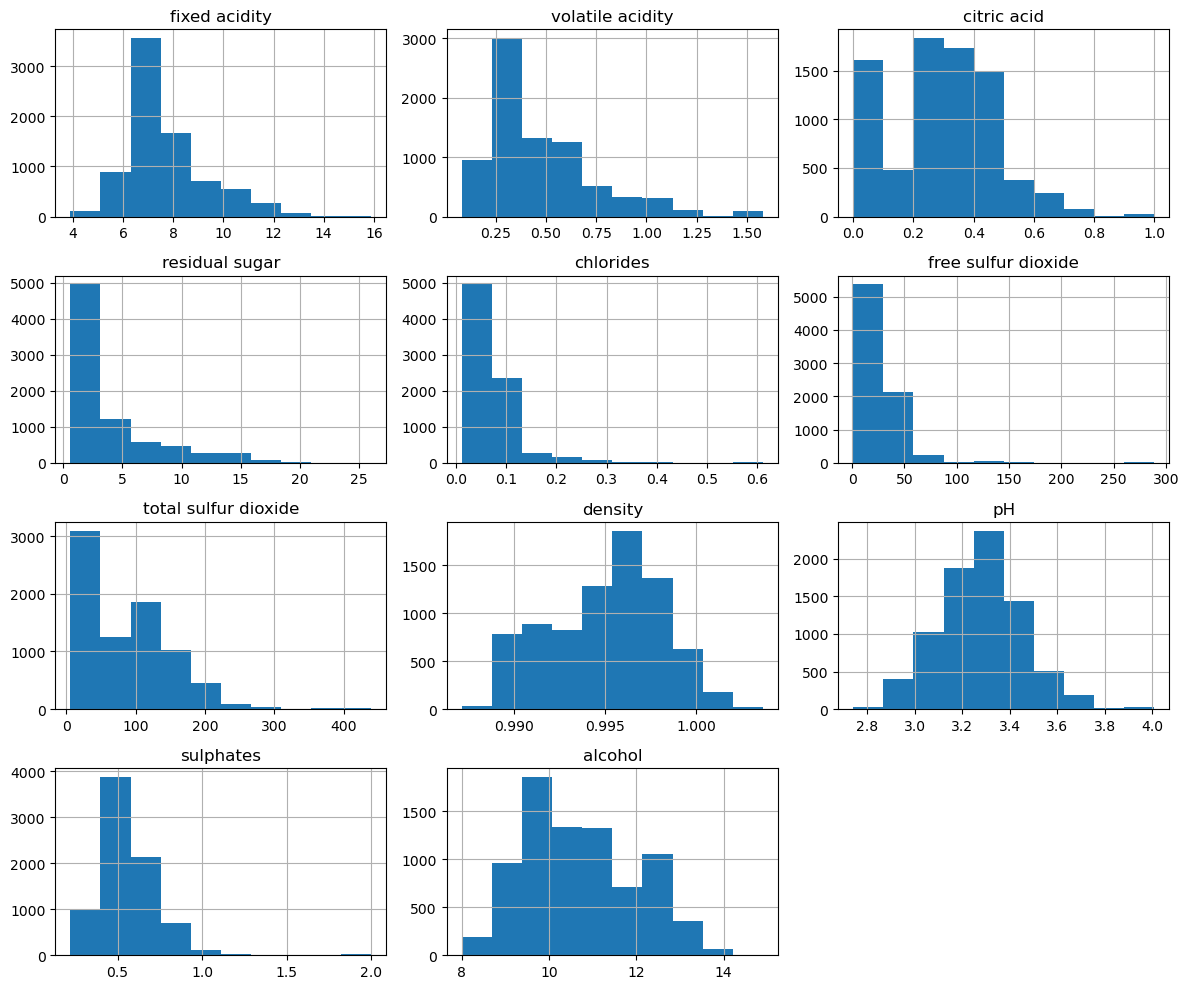

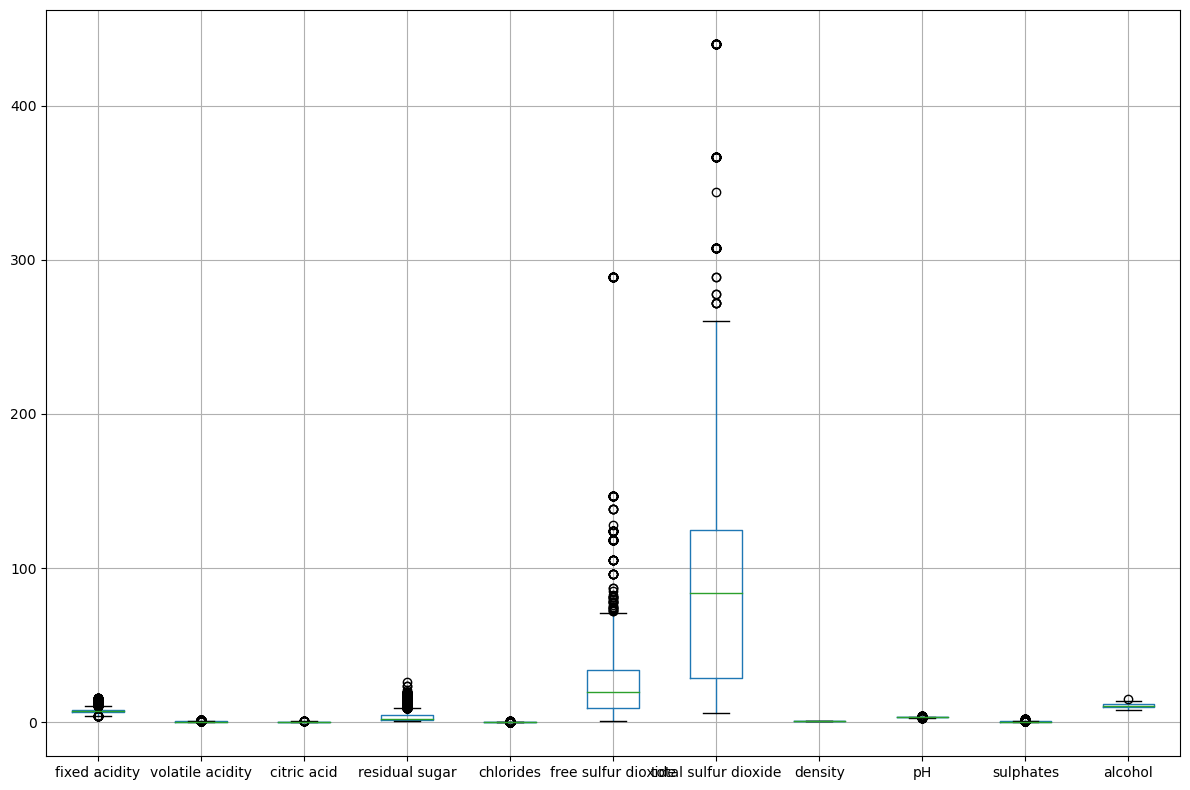

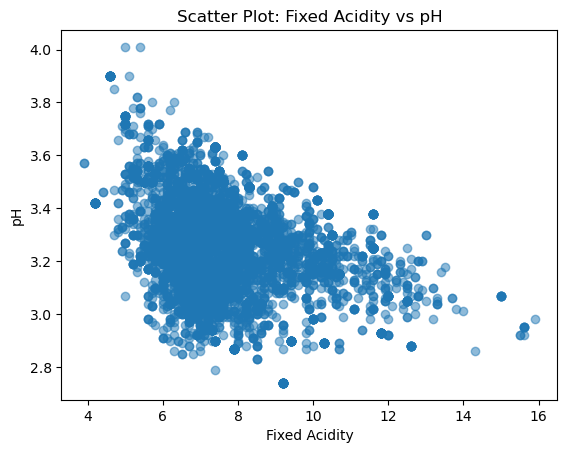

Grouped data:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.126416          0.702854     0.231742        3.920503   
4             7.519268          0.555646     0.244577        3.588862   
5             7.745491          0.485971     0.277855        4.182255   
6             7.638358          0.385758     0.304707        4.285553   
7             7.748787          0.329299     0.347556        4.057053   
8             7.133635          0.319105     0.337984        4.754813   
9             7.434962          0.297084     0.386733        4.152366   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.098724            25.871459             75.468130  0.996692   
4         0.075330            17.187805             76.807317  0.995607   
5         0.078941          

In [165]:
# Histograms of numerical columns
balanced_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots of numerical columns
balanced_df.boxplot(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Scatter plot of two numerical columns
plt.scatter(balanced_df['fixed acidity'], balanced_df['pH'], alpha=0.5)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Scatter Plot: Fixed Acidity vs pH')
plt.show()

# Group data by wine quality and calculate mean, median, etc.
grouped_data = balanced_df.groupby('quality').mean()
print("Grouped data:")
print(grouped_data)

In [169]:
quality_encoder = LabelEncoder()
balanced_df['quality'] = quality_encoder.fit_transform(balanced_df['quality'])

color_encoder = LabelEncoder()
balanced_df['color'] = color_encoder.fit_transform(balanced_df['color'])

# Standardize the X values
scaler = StandardScaler()
X = balanced_df.drop('quality', axis=1).values
X = scaler.fit_transform(X)

y = balanced_df['quality'].values

In [170]:


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Create PyTorch Datasets
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train).long())
val_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val).long())
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test).long())

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [171]:
train_dataset, val_dataset, test_dataset

(<torch.utils.data.dataset.Subset at 0x7f94e43aaca0>,
 <torch.utils.data.dataset.Subset at 0x7f94e43d3400>)

In [209]:
# Neural Network Architecture
class WineQualityNet(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(WineQualityNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [223]:

# Hyperparameters
input_dim = X_train.shape[1]
hidden_dim1 = 100  # number of units in the first hidden layer
hidden_dim2 = 50  # number of units in the second hidden layer
hidden_dim3 = 25  # number of units in the third hidden layer
output_dim = len(np.unique(y_train))  # Number of classes for classification

# Initialize the model, loss function, and optimizer
model = WineQualityNet(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.005)
# Define the learning rate scheduler
#scheduler = StepLR(optimizer, step_size=1, gamma=0.1)


In [224]:
n_epochs = 25
# Update this so that the activation values are pulled out during the forward pass

for epoch in range(n_epochs):
    # Training
    model.train()
    correct_train = 0
    total_train = 0
    train_loss = 0.0
    pbar_train = tqdm(enumerate(train_loader), total=len(train_loader), leave=True)
    for batch_idx, (data, target) in pbar_train:
        optimizer.zero_grad()
        data = data.float()
        target = target.long()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        #scheduler.step()
        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total_train += target.size(0)
        correct_train += (predicted == target).sum().item()
        pbar_train.set_description(f"Epoch {epoch+1} [Train] - Loss: {train_loss/(batch_idx+1):.4f}, Accuracy: {correct_train/total_train:.2f}")
    train_accuracy = correct_train / total_train

    # Validation
    model.eval()
    with torch.no_grad():
        correct_val = 0
        total_val = 0
        val_loss = 0.0
        pbar_val = tqdm(enumerate(val_loader), total=len(val_loader), leave=True)
        for batch_idx, (data, target) in pbar_val:
            data = data.float()
            target = target.long()
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)
            pbar_val.set_description(f"Epoch {epoch+1} [Validation] - Loss: {val_loss/(batch_idx+1):.4f}, Accuracy: {correct_val/total_val:.2f}")
        val_accuracy = correct_val / total_val


Epoch 1 [Train] - Loss: 1.3510, Accuracy: 0.43: 100%|██████████| 158/158 [00:00<00:00, 239.94it/s]
Epoch 1 [Validation] - Loss: 1.0848, Accuracy: 0.54: 100%|██████████| 40/40 [00:00<00:00, 372.35it/s]
Epoch 2 [Train] - Loss: 1.0212, Accuracy: 0.58: 100%|██████████| 158/158 [00:00<00:00, 245.50it/s]
Epoch 2 [Validation] - Loss: 1.0054, Accuracy: 0.60: 100%|██████████| 40/40 [00:00<00:00, 374.41it/s]
Epoch 3 [Train] - Loss: 0.9172, Accuracy: 0.62: 100%|██████████| 158/158 [00:00<00:00, 245.99it/s]
Epoch 3 [Validation] - Loss: 0.8914, Accuracy: 0.63: 100%|██████████| 40/40 [00:00<00:00, 378.29it/s]
Epoch 4 [Train] - Loss: 0.8493, Accuracy: 0.65: 100%|██████████| 158/158 [00:00<00:00, 231.83it/s]
Epoch 4 [Validation] - Loss: 0.8670, Accuracy: 0.64: 100%|██████████| 40/40 [00:00<00:00, 375.54it/s]
Epoch 5 [Train] - Loss: 0.8030, Accuracy: 0.67: 100%|██████████| 158/158 [00:00<00:00, 253.11it/s]
Epoch 5 [Validation] - Loss: 0.8568, Accuracy: 0.64: 100%|██████████| 40/40 [00:00<00:00, 443.94i

In [216]:
# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data = data.float()
        target = target.long()
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_accuracy = correct / total
print('Test Accuracy: {:.2f}%'.format(test_accuracy*100))

Test Accuracy: 79.34%
